Please see http://hicathy.com/restaurant_data/index.php for a summarization and display of this project. 

In [100]:
import numpy as np 
import pandas as pd 
from pandas import Series, DataFrame 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
restaurant_df = pd.read_csv('DOHMH_Python.csv')

In [5]:
restaurant_df

,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE,ACTION,VIOLATION,VIOLATION_DESCRIPTION,CRITICAL_FLAG,SCORE,GRADE,INSPECTION_TYPE
0,STARBUCKS,Manhattan,78,SPRING STREET,10012.0,Café/Coffee/Tea,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,9.0,A,Cycle Inspection / Initial Inspection
1,110 KENNEDY FRIED CHICKEN,Staten Island,110,VICTORY BOULEVARD,10301.0,Chicken,Establishment Closed by DOHMH. Violations wer...,02C,Hot food item that has been cooked and refrige...,Y,39.0,NaN,Pre-permit (Operational) / Initial Inspection
2,HQ CLUB,Manhattan,552,WEST 38 STREET,10018.0,American,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,13.0,A,Cycle Inspection / Initial Inspection
3,RESTAURANT TATIANA,Brooklyn,3152,BRIGHTON 6 STREET,11235.0,Russian,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,12.0,A,Cycle Inspection / Re-inspection
4,KO SUSHI,Manhattan,1329,2 AVENUE,10021.0,Japanese,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,7.0,NaN,Cycle Inspection / Initial Inspection
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316930,SPRING HILL HOTEL,Manhattan,25,WEST 37 STREET,10018.0,Continental,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Y,20.0,NaN,Cycle Inspection / Initial Inspection
316931,PARIS BAGUETTE,Manhattan,591,LEXINGTON AVENUE,10022.0,Bakery,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,35.0,NaN,Cycle Inspection / Initial Inspection
316932,VESUVIO RESTAURANT & PIZZA,Brooklyn,7303,3 AVENUE,11209.0,Pizza/Italian,Violations were cited in the following area(s).,02H,Food not cooled by an approved method whereby ...,Y,18.0,B,Cycle Inspection / Re-inspection
316933,ROSEBANK PIZZA,Staten Island,1372,BAY STREET,10305.0,Pizza/Italian,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Y,12.0,A,Cycle Inspection / Re-inspection


Question 1: Are certain violations more prominent in certain neighborhoods? 

In [13]:
manhattan_df = restaurant_df[restaurant_df['BORO'] == 'Manhattan']

In [9]:
manhattan_df

,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE,ACTION,VIOLATION,VIOLATION_DESCRIPTION,CRITICAL_FLAG,SCORE,GRADE,INSPECTION_TYPE
0,STARBUCKS,Manhattan,78,SPRING STREET,10012.0,Café/Coffee/Tea,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,9.0,A,Cycle Inspection / Initial Inspection
2,HQ CLUB,Manhattan,552,WEST 38 STREET,10018.0,American,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,13.0,A,Cycle Inspection / Initial Inspection
4,KO SUSHI,Manhattan,1329,2 AVENUE,10021.0,Japanese,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,7.0,NaN,Cycle Inspection / Initial Inspection
5,BARDOLINO PIZZA II,Manhattan,411,AMSTERDAM AVENUE,10024.0,Pizza,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,40.0,NaN,Cycle Inspection / Initial Inspection
9,XI'AN FAMOUS FOODS,Manhattan,38,EAST 23 STREET,10010.0,Chinese,Violations were cited in the following area(s).,04K,Evidence of rats or live rats present in facil...,Y,11.0,A,Cycle Inspection / Re-inspection
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316920,STARBUCKS,Manhattan,135,JOHN STREET,10038.0,Café/Coffee/Tea,Establishment Closed by DOHMH. Violations wer...,06D,"Food contact surface not properly washed, rins...",Y,43.0,NaN,Cycle Inspection / Initial Inspection
316923,BLUE SPOON,Manhattan,90,WILLIAM STREET,10038.0,American,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Y,33.0,NaN,Cycle Inspection / Initial Inspection
316930,SPRING HILL HOTEL,Manhattan,25,WEST 37 STREET,10018.0,Continental,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Y,20.0,NaN,Cycle Inspection / Initial Inspection
316931,PARIS BAGUETTE,Manhattan,591,LEXINGTON AVENUE,10022.0,Bakery,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,35.0,NaN,Cycle Inspection / Initial Inspection


In [14]:
#Separate the main df into other df's based on borough
brooklyn_df = restaurant_df[restaurant_df['BORO'] == 'Brooklyn']
bronx_df = restaurant_df[restaurant_df['BORO'] == 'Bronx']
queens_df = restaurant_df[restaurant_df['BORO'] == 'Queens']
si_df = restaurant_df[restaurant_df['BORO'] == 'Staten Island']

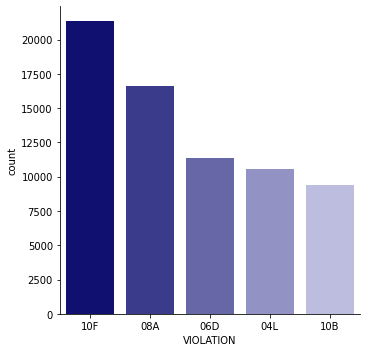

In [35]:
#Seaborn Barplot for the Manhattan DataFrame 
m_violation_plot = sns.catplot('VIOLATION', data=manhattan_df, kind='count', 
           order=manhattan_df.VIOLATION.value_counts().iloc[:5].index,
           palette=violation_palette)

m_violation_plot.savefig("manhattan_violation_plot.png")


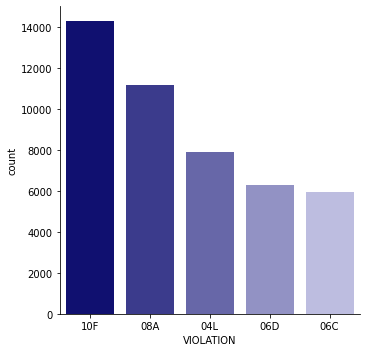

In [38]:
#Repeat for brooklyn violation plot 
bk_violation_plot = sns.catplot('VIOLATION', data=brooklyn_df, kind='count', 
           order=brooklyn_df.VIOLATION.value_counts().iloc[:5].index,
           palette=violation_palette)

bk_violation_plot.savefig("brooklyn_violation_plot.png")

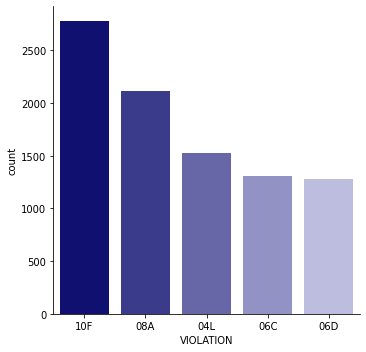

In [39]:
#queens violation plot 
q_violation_plot = sns.catplot('VIOLATION', data=queens_df, kind='count', 
           order=queens_df.VIOLATION.value_counts().iloc[:5].index,
           palette=violation_palette)

In [40]:
q_violation_plot.savefig("violation plots python/queens_violation_plot.png")

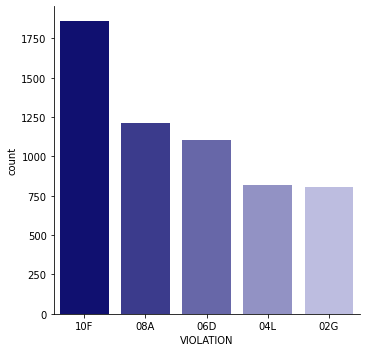

In [41]:
#staten island violation plot 
si_violation_plot = sns.catplot('VIOLATION', data=si_df, kind='count', 
           order=si_df.VIOLATION.value_counts().iloc[:5].index,
           palette=violation_palette)

In [42]:
si_violation_plot.savefig("violation plots python/si_violation_plot.png")

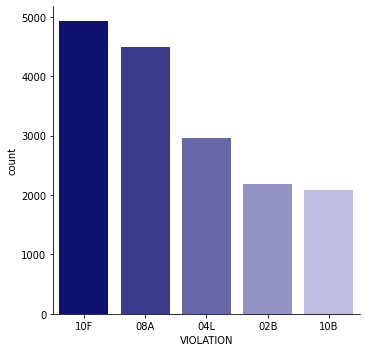

In [43]:
#bronx violation plot 
bronx_violation_plot = sns.catplot('VIOLATION', data=bronx_df, kind='count', 
           order=bronx_df.VIOLATION.value_counts().iloc[:5].index,
           palette=violation_palette)

In [44]:
bronx_violation_plot.savefig("violation plots python/bronx_violation_plot.png")

In [1]:
import pandas as pd 
from matplotlib.pyplot import pie,axis,show

Question 2 - Are certain violations more prominent among cuisine types? 

In [11]:
#View the top 10 prominent cuisine types
cuisine = restaurant_df.CUISINE.value_counts().iloc[:10]
cuisine

American                                                            69251
Chinese                                                             30485
Café/Coffee/Tea                                                     17182
Pizza                                                               14171
Italian                                                             14004
Mexican                                                             13966
Japanese                                                            11934
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    11909
Caribbean                                                           11286
Bakery                                                               9209
Name: CUISINE, dtype: int64

In [16]:
#Split the main df based on cuisine type (only for the top 8 cuisine)
american_df = restaurant_df[restaurant_df['CUISINE']=='American']

In [17]:
american_df

,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE,ACTION,VIOLATION,VIOLATION_DESCRIPTION,CRITICAL_FLAG,SCORE,GRADE,INSPECTION_TYPE
2,HQ CLUB,Manhattan,552,WEST 38 STREET,10018.0,American,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,13.0,A,Cycle Inspection / Initial Inspection
7,ERV'S,Brooklyn,2122,BEEKMAN PLACE,11225.0,American,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,28.0,C,Cycle Inspection / Re-inspection
24,BLUE RUIN,Manhattan,538,9 AVENUE,10018.0,American,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,12.0,A,Cycle Inspection / Initial Inspection
31,PENELOPE,Manhattan,159,LEXINGTON AVENUE,10016.0,American,Establishment Closed by DOHMH. Violations wer...,06A,Personal cleanliness inadequate. Outer garment...,Y,71.0,NaN,Pre-permit (Operational) / Initial Inspection
32,ROTISSERIE,Manhattan,225,LIBERTY STREET,10280.0,American,Violations were cited in the following area(s).,02G,Cold food item held above 41º F (smoked fish a...,Y,18.0,NaN,Pre-permit (Operational) / Initial Inspection
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316915,BROADWAY DIVE,Manhattan,2662,BROADWAY,10025.0,American,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,10.0,A,Cycle Inspection / Initial Inspection
316918,FLEX MUSSELS,Manhattan,174,EAST 82 STREET,10028.0,American,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Y,12.0,A,Cycle Inspection / Re-inspection
316921,BURGER KING,Brooklyn,971,FLATBUSH AVENUE,11226.0,American,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,11.0,A,Cycle Inspection / Re-inspection
316922,RED WHITE & BREW,Brooklyn,8910,5 AVENUE,11209.0,American,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,N,12.0,NaN,Cycle Inspection / Initial Inspection


In [28]:
#counts of number of violations 
am_violation = american_df.VIOLATION.value_counts().iloc[:5]

In [25]:
am_violation

10F    10009
08A     7672
06D     6163
04L     4580
10B     4553
Name: VIOLATION, dtype: int64

In [44]:
#splitting dataframe for the rest of the cuisine types 
chinese_df = restaurant_df[restaurant_df['CUISINE']=='Chinese']

In [48]:
cct_df = restaurant_df[restaurant_df['CUISINE']=='Café/Coffee/Tea']
pizza_df = restaurant_df[restaurant_df['CUISINE']=='Pizza']
italian_df = restaurant_df[restaurant_df['CUISINE']=='Italian']
mexican_df = restaurant_df[restaurant_df['CUISINE']=='Mexican']
japanese_df = restaurant_df[restaurant_df['CUISINE']=='Japanese']
latin_df = restaurant_df[restaurant_df['CUISINE']=='Latin (Cuban, Dominican, Puerto Rican, South & Central American)']

In [49]:
#splitting the cuisine dataframes further into top5 violations per cuisine
chinese_violation = chinese_df.VIOLATION.value_counts().iloc[:5]
cct_violation = cct_df.VIOLATION.value_counts().iloc[:5]
pizza_violation = pizza_df.VIOLATION.value_counts().iloc[:5]
italian_violation = italian_df.VIOLATION.value_counts().iloc[:5]
mexican_violation = mexican_df.VIOLATION.value_counts().iloc[:5]
japanese_violation = japanese_df.VIOLATION.value_counts().iloc[:5]
latin_violation = latin_df.VIOLATION.value_counts().iloc[:5]

/Users/Cathy/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/Cathy/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/Cathy/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/Cathy/opt/anaconda3/li

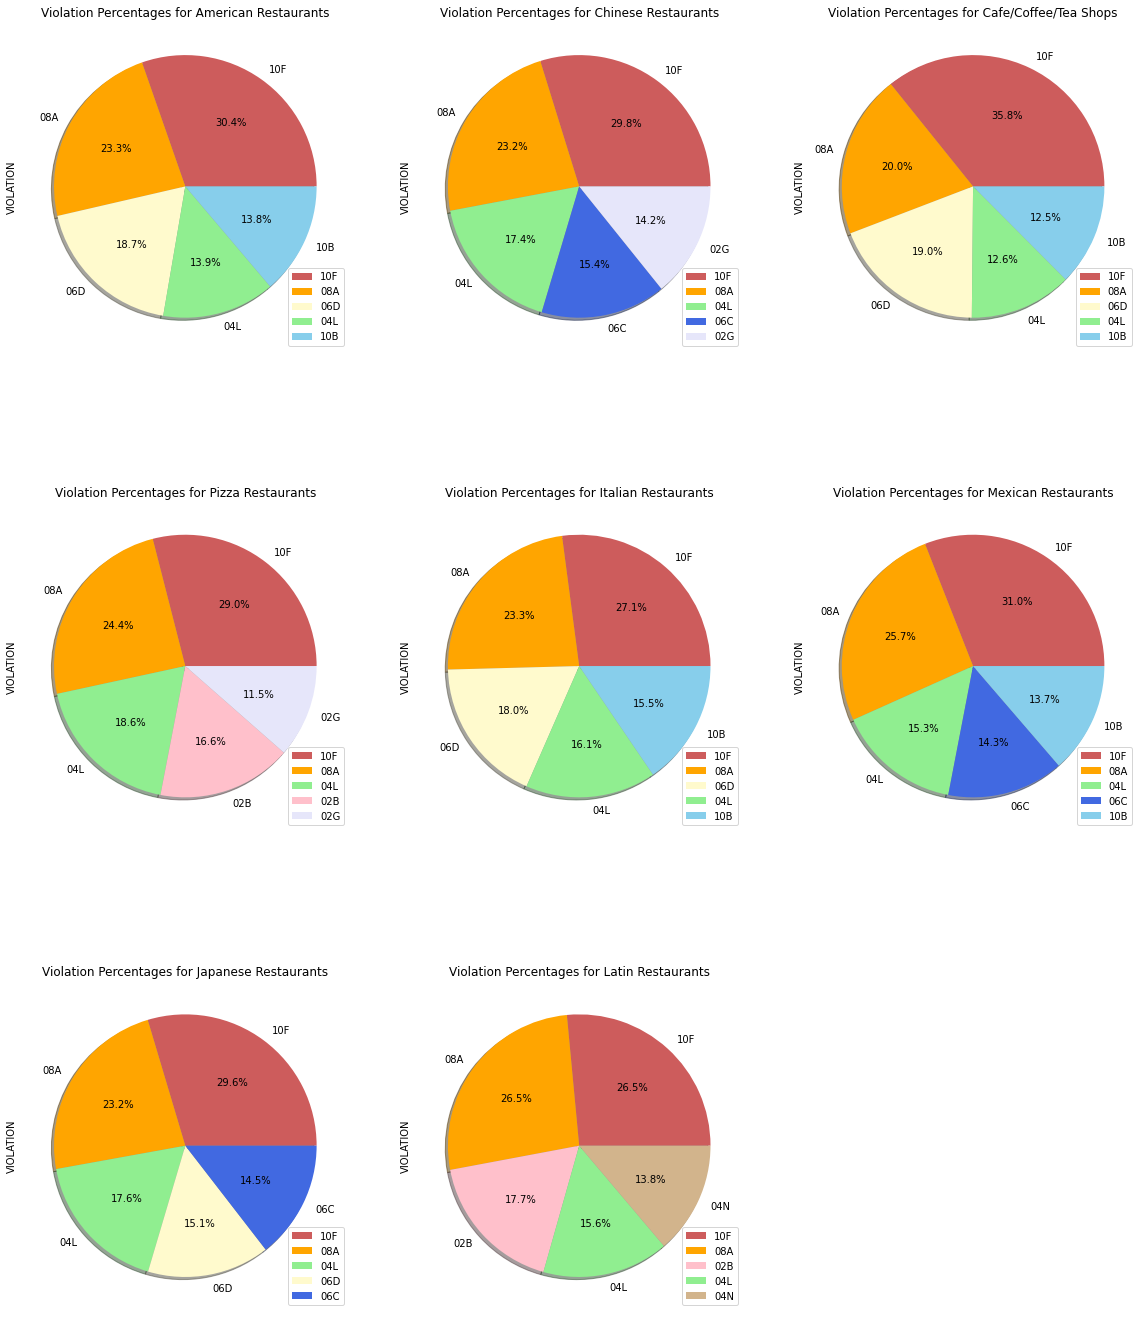

In [106]:
#pie chart from the violation series from the cuisine splitted df's
#arranged in rows 

#American Restaurants
plt.figure(figsize=(20,25))
plt.subplot(3,3,1)
am_violation.plot(kind='pie',autopct='%1.1f%%', shadow=True, 
                 colors=['indianred','orange','lemonchiffon','lightgreen','skyblue'])
plt.legend(loc=4,fontsize=10)
plt.title('Violation Percentages for American Restaurants')

#Chinese Restaurants 
plt.subplot(3,3,2)
chinese_violation.plot(kind='pie',autopct='%1.1f%%',shadow=True,
                       colors=['indianred','orange','lightgreen','royalblue','lavender'])
plt.legend(loc=4,fontsize=10)
plt.title('Violation Percentages for Chinese Restaurants')

#Cafe/Coffee/Tea Restaurants
plt.subplot(3,3,3)
cct_violation.plot(kind='pie',autopct='%1.1f%%',shadow=True,
                   colors=['indianred','orange','lemonchiffon','lightgreen','skyblue'])
plt.legend(loc=4,fontsize=10)
plt.title('Violation Percentages for Cafe/Coffee/Tea Shops')

#pizza Restaurants
plt.subplot(3,3,4)
pizza_violation.plot(kind='pie',autopct='%1.1f%%', shadow=True,
                     colors=['indianred','orange','lightgreen','pink','lavender'])
plt.legend(loc=4,fontsize=10)
plt.title('Violation Percentages for Pizza Restaurants')

#italian Restaurants 
plt.subplot(3,3,5)
italian_violation.plot(kind='pie',autopct='%1.1f%%',shadow=True,
                       colors=['indianred','orange','lemonchiffon','lightgreen','skyblue'])
plt.legend(loc=4,fontsize=10)
plt.title('Violation Percentages for Italian Restaurants')

#mexican
plt.subplot(3,3,6)
mexican_violation.plot(kind='pie',autopct='%1.1f%%',shadow=True,
                       colors=['indianred','orange','lightgreen','royalblue','skyblue'])
plt.legend(loc=4,fontsize=10)
plt.title('Violation Percentages for Mexican Restaurants')

#japanese 
plt.subplot(3,3,7)
japanese_violation.plot(kind='pie',autopct='%1.1f%%',shadow=True,
                        colors=['indianred','orange','lightgreen','lemonchiffon','royalblue'])
plt.legend(loc=4,fontsize=10)
plt.title('Violation Percentages for Japanese Restaurants')

#Latin Restaurants
plt.subplot(3,3,8)
latin_violation.plot(kind='pie',autopct='%1.1f%%',shadow=True,
                     colors=['indianred','orange','pink','lightgreen','tan'])
plt.legend(loc=4,fontsize=10)
plt.title('Violation Percentages for Latin Restaurants')

plt.savefig("violation plots python/cuisine_plots_tight.png", bbox_inches='tight')

See http://www.hicathy.com/restaurant_data/index.php for a full analysis of findings. 